In [1]:
## Use this data to run the analysis of your projects

## run analysis for highest and lowest aproxi cost, rating 0n location, on dishliked, 
## use isin() method to check for people that 
## have a particular dish
## top 10 type of data liked by people

In [2]:
## importing libraries to use
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
## reading the file
df = pd.read_csv('zomatocleaned_v1.csv')

In [4]:
df.shape

(9880, 12)

In [5]:
## reading the head()
df.head()

,id,name,online_order,book_table,rating,votes,location,rest_type,dish_liked,cuisines,approx_cost,type
0,1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet
1,3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet
2,4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet
3,6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800.0,Buffet
4,11,CafDown The Alley,Yes,No,4.1,402,Banashankari,Cafe,"Waffles, Pasta, Crispy Chicken, Honey Chilli C...",Cafe,500.0,Cafes


In [6]:
## The info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9880 entries, 0 to 9879
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            9880 non-null   int64  
 1   name          9880 non-null   object 
 2   online_order  9880 non-null   object 
 3   book_table    9880 non-null   object 
 4   rating        9880 non-null   float64
 5   votes         9880 non-null   int64  
 6   location      9880 non-null   object 
 7   rest_type     9844 non-null   object 
 8   dish_liked    4545 non-null   object 
 9   cuisines      9876 non-null   object 
 10  approx_cost   9880 non-null   float64
 11  type          9154 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 926.4+ KB


In [7]:
## getting the null vals
df.isnull().value_counts()

id     name   online_order  book_table  rating  votes  location  rest_type  dish_liked  cuisines  approx_cost  type 
False  False  False         False       False   False  False     False      True        False     False        False    5267
                                                                            False       False     False        False    3850
                                                                                                               True      679
                                                                            True        False     False        True       44
                                                                 True       True        False     False        False      20
                                                                            False       False     False        False      13
                                                                 False      True        True      False        False       4
        

In [8]:
df.isnull().count()

id              9880
name            9880
online_order    9880
book_table      9880
rating          9880
votes           9880
location        9880
rest_type       9880
dish_liked      9880
cuisines        9880
approx_cost     9880
type            9880
dtype: int64

In [9]:
df.isnull().sum()

id                 0
name               0
online_order       0
book_table         0
rating             0
votes              0
location           0
rest_type         36
dish_liked      5335
cuisines           4
approx_cost        0
type             726
dtype: int64

In [10]:
df.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            5 non-null      int64  
 1   name          5 non-null      object 
 2   online_order  5 non-null      object 
 3   book_table    5 non-null      object 
 4   rating        5 non-null      float64
 5   votes         5 non-null      int64  
 6   location      5 non-null      object 
 7   rest_type     5 non-null      object 
 8   dish_liked    4 non-null      object 
 9   cuisines      5 non-null      object 
 10  approx_cost   5 non-null      float64
 11  type          5 non-null      object 
dtypes: float64(2), int64(2), object(8)
memory usage: 608.0+ bytes


In [11]:
## excluding the column data type int
col_cat = df.select_dtypes(exclude = 'int')
col_cat

,name,online_order,book_table,rating,location,rest_type,dish_liked,cuisines,approx_cost,type
0,Spice Elephant,Yes,No,4.1,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet
1,Addhuri Udupi Bhojana,No,No,3.7,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet
2,Grand Village,No,No,3.8,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet
3,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800.0,Buffet
4,CafDown The Alley,Yes,No,4.1,Banashankari,Cafe,"Waffles, Pasta, Crispy Chicken, Honey Chilli C...",Cafe,500.0,Cafes
...,...,...,...,...,...,...,...,...,...,...
9875,Fujian Express,Yes,No,3.8,"ITPL Main Road, Whitefield",Food Court,"Noodles, Chicken Noodle, Momos, American Chops...","Thai, Chinese, Momos",600.0,Dine-out
9876,SLV Grand,Yes,No,3.3,"ITPL Main Road, Whitefield",Quick Bites,NaN,South Indian,300.0,Dine-out
9877,Nook - Aloft Bengaluru Cessna Business Park,No,Yes,4.2,Bellandur,Casual Dining,"Chicken Quesadilla, Naan, Breakfast Buffet, Ch...","North Indian, Continental, Asian",1800.0,Dine-out
9878,SeeYa Restaurant,No,No,3.3,KR Puram,Quick Bites,NaN,"North Indian, Kerala, Chinese",350.0,Dine-out


In [12]:
# function to drop null vals
def drop_na_values(col_cat, axis=0):
    return col_cat.dropna(axis=axis)

In [13]:
## cleaning the data by getting rid of the null vals
cleaned_data = drop_na_values(col_cat)

In [14]:
cleaned_data.shape

(3850, 10)

In [15]:
 cleaned_data.isnull().sum()

name            0
online_order    0
book_table      0
rating          0
location        0
rest_type       0
dish_liked      0
cuisines        0
approx_cost     0
type            0
dtype: int64

In [16]:
cleaned_data.isnull().value_counts()

name   online_order  book_table  rating  location  rest_type  dish_liked  cuisines  approx_cost  type 
False  False         False       False   False     False      False       False     False        False    3850
dtype: int64

In [17]:
# writing a function to get unique vals of cleaned data cols
def get_unique_values(cleaned_data):
    for col in cleaned_data:
        print('--'*20)
        print(col)
        print('--'* 20)
        print(cleaned_data[col].unique())

In [18]:
get_unique_values(cleaned_data)

----------------------------------------
name
----------------------------------------
['Spice Elephant' 'Addhuri Udupi Bhojana' 'Grand Village' ...
 'Little Onnion' 'Fujian Express'
 'Nook - Aloft Bengaluru Cessna Business Park']
----------------------------------------
online_order
----------------------------------------
['Yes' 'No']
----------------------------------------
book_table
----------------------------------------
['No' 'Yes']
----------------------------------------
rating
----------------------------------------
[4.1 3.7 3.8 4.2 4.  3.9 3.  3.6 3.1 4.3 2.6 3.3 3.5 4.5 2.5 3.4 2.8 2.7
 4.7 2.9 2.2 3.2 2.3 4.4 2.4 0.  4.6 4.8 2.1 4.9 2. ]
----------------------------------------
location
----------------------------------------
['Banashankari' 'Basavanagudi' 'Rajarajeshwari Nagar' 'Kumaraswamy Layout'
 'Mysore Road' 'Jayanagar' 'Uttarahalli' 'South Bangalore' 'Vijay Nagar'
 'Bannerghatta Road' 'JP Nagar' 'BTM' 'Shanti Nagar' 'City Market'
 'Richmond Road' 'Bellandur' 'Sar

In [19]:
cleaned_data.rest_type.value_counts()[:10]

Casual Dining         1203
Quick Bites           1126
Cafe                   250
Dessert Parlor         212
Delivery               205
Takeaway, Delivery     105
Casual Dining, Bar      74
Fine Dining             64
Food Court              54
Bakery                  47
Name: rest_type, dtype: int64

In [20]:
## geting the top 10 rest_type
rest_type = cleaned_data.rest_type.value_counts()[:10].reset_index()

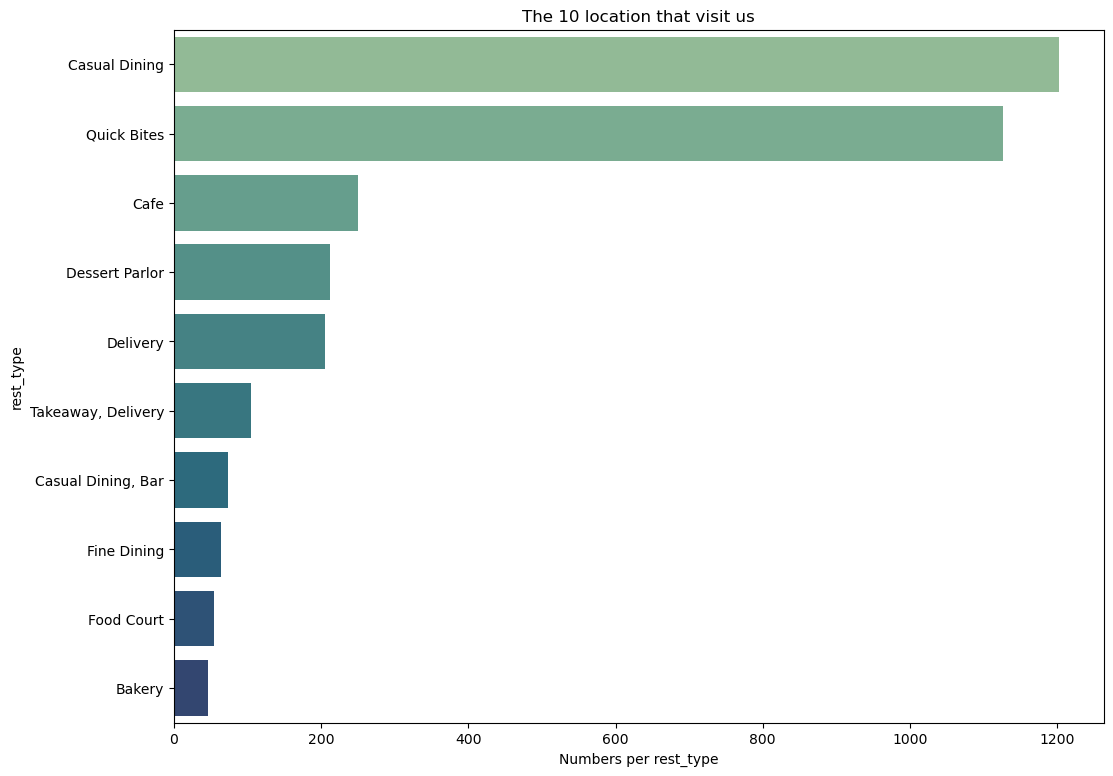

In [21]:
## setting the axis
plt.figure(figsize=(12,9))
sns.barplot(y='index', x='rest_type', data= rest_type, palette= 'crest')
plt.xlabel('Numbers per rest_type')
plt.ylabel('rest_type')
plt.title('The 10 location that visit us')
plt.show()

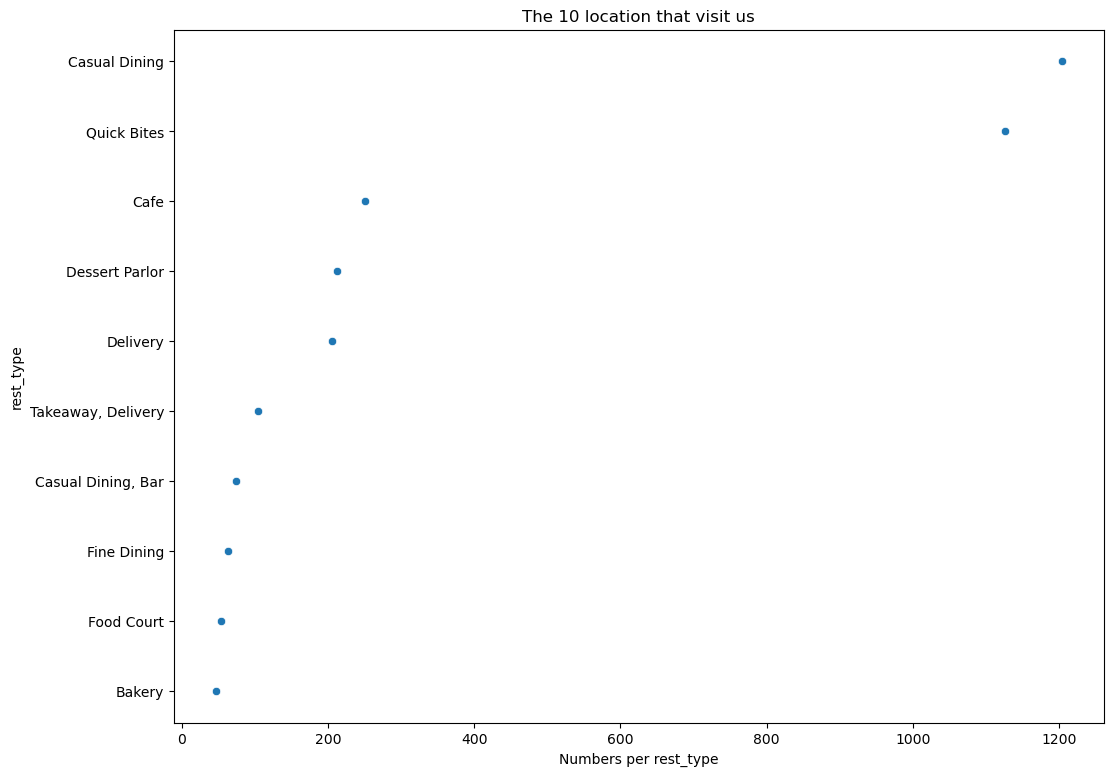

In [22]:
plt.figure(figsize=(12,9))
sns.scatterplot(data=rest_type, y='index', x='rest_type')
plt.xlabel('Numbers per rest_type')
plt.ylabel('rest_type')
plt.title('The 10 location that visit us')
plt.show()

In [23]:
## geting the top 10 locs with highest rest_types restuarants
cleaned_data.groupby('rest_type')['location'].max().value_counts()[:10]

Whitefield               31
Koramangala 5th Block     4
Yeshwantpur               4
Ulsoor                    3
Sarjapur Road             3
Malleshwaram              2
Lavelle Road              2
Race Course Road          1
Nagawara                  1
Residency Road            1
Name: location, dtype: int64

In [24]:
## geting the top 10 locs restuarants
cleaned_data.groupby('rest_type')['location'].min().value_counts()

BTM                           19
Banashankari                   5
Brigade Road                   5
Domlur                         4
Electronic City                3
Bellandur                      3
Indiranagar                    3
Whitefield                     3
Bannerghatta Road              2
HSR                            2
Frazer Town                    2
Banaswadi                      1
Commercial Street              1
JP Nagar                       1
Residency Road                 1
East Bangalore                 1
Basaveshwara Nagar             1
Seshadripuram                  1
Lavelle Road                   1
Marathahalli                   1
Majestic                       1
Church Street                  1
Old Airport Road               1
Koramangala 5th Block          1
ITPL Main Road, Whitefield     1
Name: location, dtype: int64

In [25]:
## geting the highest rests at a certain location
rest_types = cleaned_data.groupby('rest_type')['location'].max().value_counts()[:10].reset_index()

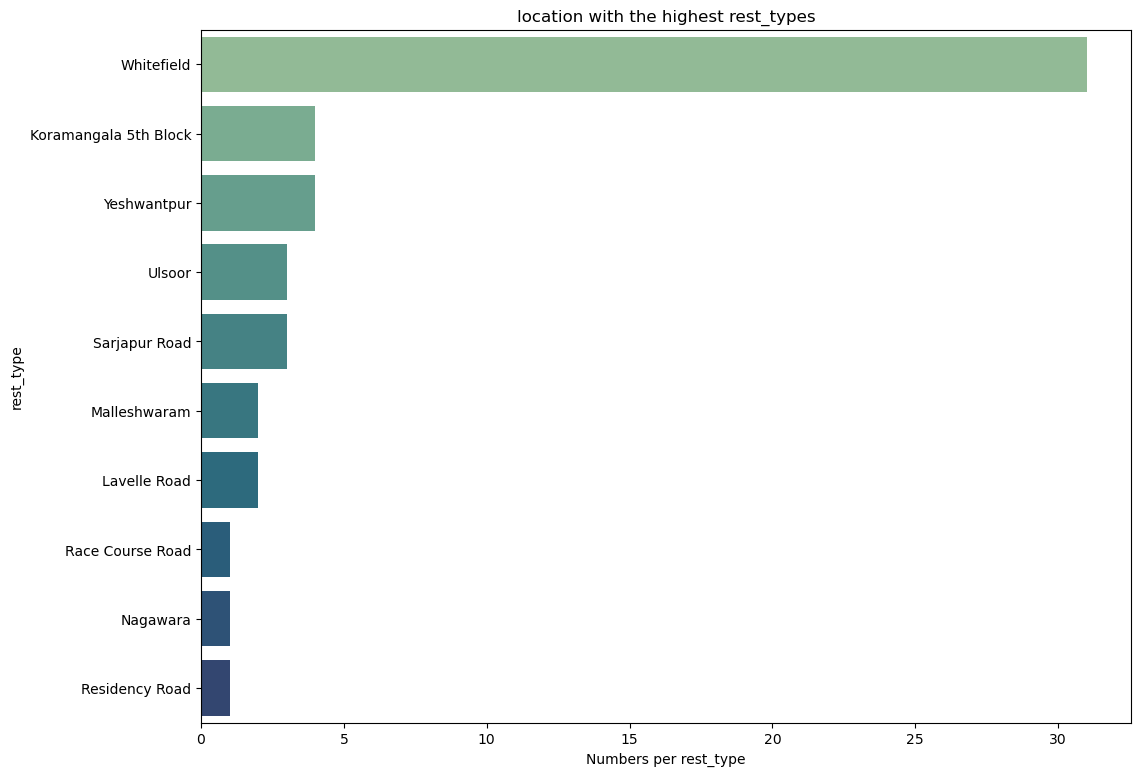

In [26]:
plt.figure(figsize=(12,9))
sns.barplot(data=rest_types, x='location', y='index', palette = 'crest' )
plt.xlabel('Numbers per rest_type')
plt.ylabel('rest_type')
plt.title('location with the highest rest_types')
plt.show()

In [27]:
cleaned_data.groupby(['location','name']).approx_cost.mean().sort_values(ascending=True).sort_values(ascending=False)[:10]

location          name                                  
Old Airport Road  Le Cirque Signature - The Leela Palace    6000.0
Sankey Road       Royal Afghan - ITC Windsor                5000.0
Marathahalli      Malties - Radisson Blu                    4500.0
Sankey Road       La Brasserie - Le Meridien                4100.0
Lavelle Road      Alba - JW Marriott Bengaluru              4000.0
Sankey Road       Dum Pukht Jolly Nabobs - ITC Windsor      4000.0
Richmond Road     Edo Restaurant & Bar - ITC Gardenia       4000.0
Old Airport Road  Jamavar - The Leela Palace                4000.0
Residency Road    Riwaz - The Ritz-Carlton                  4000.0
Race Course Road  Masala Klub - The Taj West End            4000.0
Name: approx_cost, dtype: float64

In [28]:
rest_costs = cleaned_data.groupby(['location','name']).approx_cost.mean().sort_values(ascending=True).sort_values(ascending=False)[:10].reset_index()

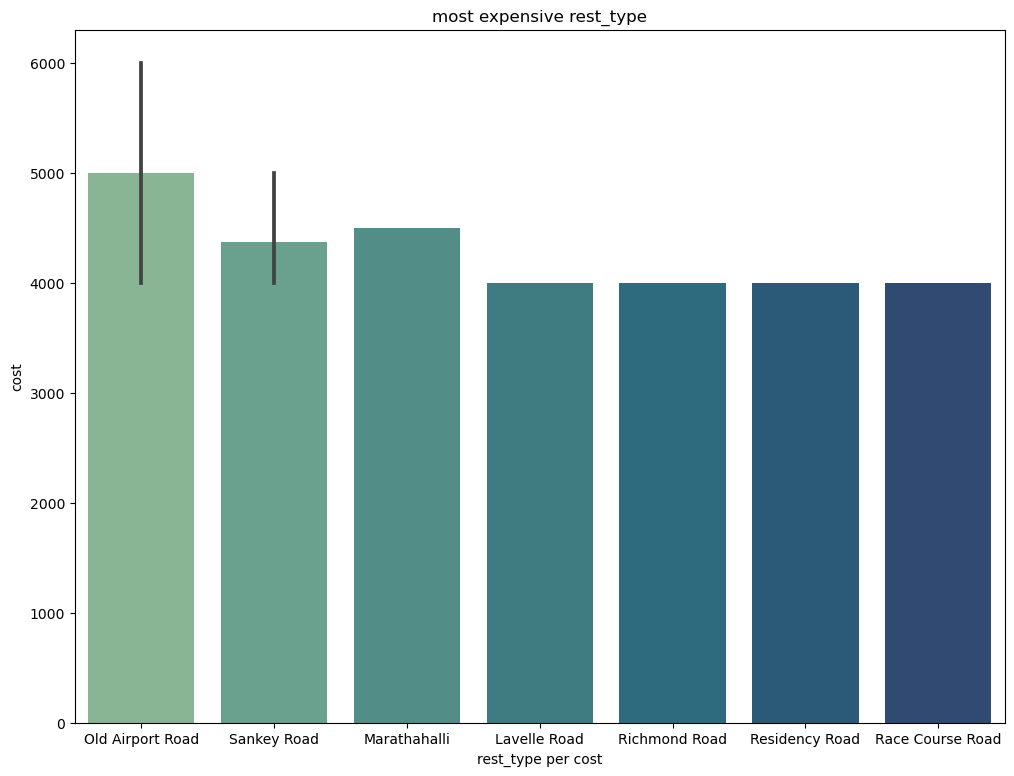

In [29]:
plt.figure(figsize=(12,9))
sns.barplot(data=rest_costs , x='location', y='approx_cost', palette = 'crest' )
plt.xlabel('rest_type per cost')
plt.ylabel('cost')
plt.title('most expensive rest_type')
plt.show()

In [30]:
cleaned_data.groupby(['location','name']).rating.mean().sort_values(ascending=True).sort_values(ascending=False)[:10]

location               name                     
Indiranagar            SantSpa Cuisine              4.9
BTM                    AB's - Absolute Barbecues    4.9
Basavanagudi           Brahmin's Coffee Bar         4.8
Rajajinagar            O.G. Variar & Sons           4.8
Whitefield             Punjab Grill                 4.8
HSR                    TBC Sky Lounge               4.7
Indiranagar            Corner House Ice Cream       4.7
Electronic City        The Big Barbeque             4.7
Marathahalli           Flechazo                     4.7
Koramangala 1st Block  Barbeque Nation              4.7
Name: rating, dtype: float64

In [31]:
cleaned_data.groupby(cleaned_data['location']=='Indiranagar')['approx_cost'].max().sort_values(ascending=True).sort_values(ascending=False)

location
False    6000.0
True     2000.0
Name: approx_cost, dtype: float64

In [32]:
cleaned_data[cleaned_data['name']=='SantSpa Cuisine']['cuisines']

8252    Healthy Food, Salad, Mediterranean
Name: cuisines, dtype: object

In [33]:
 cleaned_data.groupby(['location','rest_type'])['rating'].max().sort_values(ascending=True).sort_values(ascending=False).head()

location      rest_type    
Indiranagar   Casual Dining    4.9
BTM           Casual Dining    4.9
Rajajinagar   Bakery           4.8
Basavanagudi  Quick Bites      4.8
Whitefield    Casual Dining    4.8
Name: rating, dtype: float64

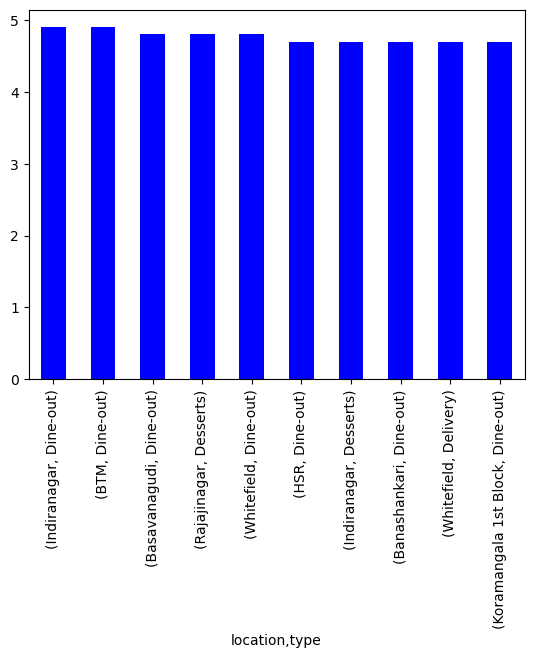

In [34]:
## The locations with the most recommended or rated rest_type
groups = df.groupby(["location", 'type'])["rating"].max().sort_values(ascending=True).sort_values(ascending=False)[:10]
groups.plot.bar(color="blue")
plt.show()

In [35]:
cleaned_data.groupby(['location','dish_liked'])['rating'].mean().sort_values(ascending=True).sort_values(ascending=False)[:10].reset_index()

,location,dish_liked,rating
0,BTM,"Tangdi Chicken, Bbq Buffet, Chocolate Icecream...",4.9
1,Indiranagar,"Biryani, Tomato Soup, Farm Pizza, Dumplings, L...",4.9
2,Basavanagudi,"Filter Coffee, Kesari Bath, Idli Vada, Upma, B...",4.8
3,Rajajinagar,"Veg Puff, Plum Cake, Sponge Cake, Tea, Coconut...",4.8
4,Whitefield,"Kulfi, Lunch Buffet, Murgh Lababdar, Kadhai Pa...",4.8
5,HSR,"Kulcha, Cocktails, Peri Peri Chicken, Masala P...",4.7
6,Koramangala 1st Block,"Cocktails, Mutton Seekh, Tangdi Chicken, Mango...",4.7
7,Banashankari,"Masala Dosa, Vada, Upma, Filter Coffee, Kesari...",4.7
8,Marathahalli,"Pizza, Lauki Halwa, Keema Pav, Mutton Kebab, C...",4.7
9,Whitefield,"Mocktails, Fish, Biryani, Dal Makhani, Wine, R...",4.7


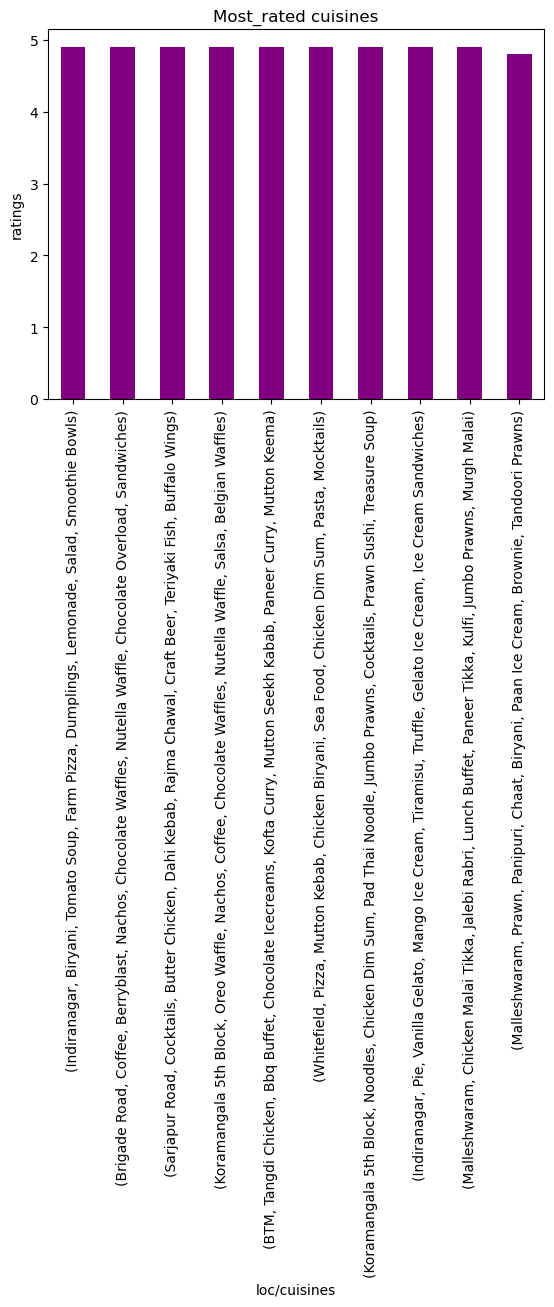

In [36]:
## The locations with the most recommended or rated rest_type
groups = df.groupby(["location", 'dish_liked'])["rating"].mean().sort_values(ascending=True).sort_values(ascending=False)[:10]
groups.plot.bar(color="purple")
plt.xlabel('loc/cuisines')
plt.ylabel('ratings')
plt.title('Most_rated cuisines')
plt.show()

In [37]:
## types
cleaned_data[cleaned_data['location']=='BTM']['type'].value_counts().sort_values(ascending=True).sort_values(ascending=False)

Delivery         101
Dine-out          45
Desserts          17
Cafes              3
Buffet             1
Pubs and bars      1
Name: type, dtype: int64

In [38]:
## rest_types
cleaned_data[cleaned_data['location']=='BTM']['rest_type'].value_counts()[:10].sort_values(ascending=True).sort_values(ascending=False)

Quick Bites                   68
Casual Dining                 42
Takeaway, Delivery            11
Cafe                           9
Delivery                       9
Dessert Parlor                 6
Bakery                         4
Quick Bites, Sweet Shop        2
Casual Dining, Bar             2
Beverage Shop, Quick Bites     2
Name: rest_type, dtype: int64

In [39]:
## cuisines
cleaned_data[cleaned_data['location']=='BTM']['cuisines'].value_counts().sort_values(ascending=True).sort_values(ascending=False)[:10]

North Indian, Chinese                  12
North Indian                           10
Biryani, North Indian                   5
South Indian, North Indian, Chinese     4
Desserts, Beverages                     3
Beverages                               3
Bakery, Desserts                        3
Cafe                                    3
Bengali, North Indian, Chinese          2
Arabian                                 2
Name: cuisines, dtype: int64

# In the location, the whitefield location showed the highest rating
# Whitefield highest type of Delivery at 153 and second was Dineout at 68
# In Whitefield rest_types Casual Dining had 84 and next Quick Biites was 54
# In Whitefield cuisines North Indian had 20 and next North and Chinese was 8.

# From these observation it is clear to say that North Indian and chinese cuisines gave it a way for whitefield toping the charts.

In [40]:
## For Residency Road
## types
cleaned_data[cleaned_data['location']=='Residency Road']['type'].value_counts()[:10].sort_values(ascending=True).sort_values(ascending=False)

Dine-out              21
Delivery              13
Desserts               3
Buffet                 2
Cafes                  2
Drinks & nightlife     1
Name: type, dtype: int64

In [41]:
## rest_types
cleaned_data[cleaned_data['location']=='Residency Road']['rest_type'].value_counts()[:10].sort_values(ascending=True).sort_values(ascending=False)

Casual Dining         11
Quick Bites            6
Dessert Parlor         5
Fine Dining            3
Delivery               2
Lounge                 2
Fine Dining, Bar       2
Cafe                   2
Pub                    2
Takeaway, Delivery     2
Name: rest_type, dtype: int64

In [42]:
## cuisines
cleaned_data[cleaned_data['location']=='Residency Road']['cuisines'].value_counts()[:10].sort_values(ascending=True).sort_values(ascending=False)

Finger Food                                2
Ice Cream, Desserts                        2
North Indian                               2
Chinese                                    2
Mangalorean, Konkan, Seafood, Kerala       1
Biryani, Kebab, Rolls                      1
North Indian, Chinese, Mughlai, Seafood    1
Continental, Chinese, Fast Food            1
Desserts, Beverages                        1
Chinese, Momos                             1
Name: cuisines, dtype: int64

# In the location, the residency road location showed the lowest rating
# Residencyy road highest type of Dineout 13 and followed by Delivery at 21
# In rest_types Casual Dining had 11 and next Quick Biites was 6
# In cuisines finger food, Ice cream and North Indian had 2.

# From these observation it is clear to the population of residency road is lower
# or probably, the restuarant types may have to improve on their quality

In [43]:
cleaned_data[cleaned_data['location']=='BTM'].head().sort_values(ascending=True, by='rating').sort_values(ascending=False, by='rating')

,name,online_order,book_table,rating,location,rest_type,dish_liked,cuisines,approx_cost,type
397,Midnight Mania,Yes,No,4.1,BTM,Quick Bites,"Peri Peri Chicken, Chicken Pizza, White Pasta,...","Pizza, Italian, Beverages",700.0,Delivery
627,Flavour of China,Yes,No,3.8,BTM,Casual Dining,"Spring Roll, Chilli Chicken, Chowmein, Sweet C...",Chinese,550.0,Delivery
460,Dev's Gugababa,Yes,No,3.5,BTM,Quick Bites,"Fish, Rasmalai, Doi Katla, Aalo Bhaja, Bhetki ...","Bengali, North Indian, Chinese",500.0,Delivery
368,Sankranthi Veg Restaurant,Yes,No,3.0,BTM,Casual Dining,"Tea, Vada Sambar, Masala Dosa","South Indian, North Indian, Chinese",600.0,Buffet
577,Udupi Thaja Thindi,Yes,No,2.9,BTM,Quick Bites,"Masala Dosa, Vada, Filter Coffee","North Indian, South Indian, Chinese, Fast Food",250.0,Delivery


In [44]:
cleaned_data[cleaned_data['location']=='Residency Road'].head().sort_values(ascending=True, by='rating').sort_values(ascending=False, by='rating')

,name,online_order,book_table,rating,location,rest_type,dish_liked,cuisines,approx_cost,type
1373,The Market - The Ritz-Carlton,No,Yes,4.3,Residency Road,Fine Dining,"Pizza, Waffles, Pasta, Sushi, Roti, Salads, Fish","North Indian, European, Thai",3400.0,Buffet
1370,Konark Vegetarian Restaurant,No,No,4.1,Residency Road,Casual Dining,"Hyderabadi Biryani, Masala Poori, Butter Masal...","North Indian, Chinese, Continental, South Indi...",500.0,Buffet
1424,The Good Grain,Yes,No,4.1,Residency Road,Casual Dining,"Curd Rice, Biryani","Healthy Food, North Indian, South Indian",400.0,Delivery
1463,Sri Udupi Park,Yes,No,3.8,Residency Road,Quick Bites,"Vada, Idli, Kharabath, Noodles, Filter Coffee","South Indian, Chinese",200.0,Delivery
1543,Masala Oota,Yes,No,3.6,Residency Road,Quick Bites,"Donne Chicken Biryani, Akki Rottis, Roti, Mutt...","South Indian, Biryani",500.0,Delivery


In [45]:
cleaned_data.groupby(['location'])['rating'].sum().sort_values(ascending=True).sort_values(ascending=False)[:10]

location
Indiranagar              957.3
Whitefield               926.4
HSR                      885.6
Marathahalli             681.9
Jayanagar                654.0
BTM                      632.4
JP Nagar                 622.8
Electronic City          516.2
Koramangala 5th Block    504.5
Bannerghatta Road        392.9
Name: rating, dtype: float64

## From the resturants data the Indiranager is the most rated location,
## with most rated resturants and types of dishes..
## followed by WHITEFIELD possibly because of the many resturuants in the location. 
## BTM is 

In [46]:
cleaned_data.rating.max()

4.9

In [47]:
cleaned_data.groupby('location')['rating'].max()[:10].sort_values(ascending=True).sort_values(ascending=False)# order

location
BTM                   4.9
Basavanagudi          4.8
Banashankari          4.7
Bellandur             4.6
Brookefield           4.5
Banaswadi             4.4
Bannerghatta Road     4.4
Basaveshwara Nagar    4.4
Brigade Road          4.4
Bommanahalli          3.9
Name: rating, dtype: float64

In [48]:
## Top 5 locations with the lowest cost
cleaned_data.groupby(['location','dish_liked'])['approx_cost'].mean().sort_values().head().reset_index()

,location,dish_liked,approx_cost
0,Domlur,"Idli, Coffee, Masala Dosa, Fruit Juices, Vada,...",40.0
1,Indiranagar,"Vada, Masala Dosa, Filter Coffee",40.0
2,Basavanagudi,"Masala Dosa, Filter Coffee, Vada, Kali Dosa, R...",100.0
3,Residency Road,"Samosa, Tea",100.0
4,HSR,"Fruit Cake, Chocolate Cake, Egg Puff",100.0


In [49]:
## Top 5 resturuants name with the lowest dish_likes
cleaned_data.groupby(['location','name'])['rating'].mean().sort_values()[:20].reset_index()

,location,name,rating
0,Electronic City,Empire Restaurant,0.0
1,Koramangala 5th Block,The Flying Trapeze,0.0
2,Electronic City,Shandys-The Beer Cocktail Hub,0.0
3,Indiranagar,The Twisted Desi,0.0
4,HSR,The Buffet Table,0.0
5,JP Nagar,Baba Chatkora,0.0
6,Koramangala 7th Block,Bob's Bar,0.0
7,Electronic City,46 Ounces Brewgarden,0.0
8,Sarjapur Road,Foodbell,0.0
9,Whitefield,Potful,0.0


In [50]:
cleaned_data[cleaned_data['name']=='Empire Restaurant']['location']

361                 Bannerghatta Road
1096                        Jayanagar
2921                  Electronic City
3404                         RT Nagar
3817                              HSR
4694                         JP Nagar
5156                     Kammanahalli
6039                              BTM
6177            Koramangala 7th Block
6867                     Malleshwaram
7480                      Frazer Town
8567                      Rajajinagar
8850                     Brigade Road
9348    Varthur Main Road, Whitefield
Name: location, dtype: object

In [51]:
## Top 5 type name with the lowest dish_likes
cleaned_data.groupby(['location','type'])['rating'].mean().round(1).sort_values(ascending=True).sort_values(ascending=False)[:10].reset_index()

,location,type,rating
0,Rajajinagar,Desserts,4.8
1,Koramangala 1st Block,Desserts,4.5
2,Race Course Road,Pubs and bars,4.5
3,Seshadripuram,Desserts,4.4
4,Koramangala 6th Block,Desserts,4.4
5,BTM,Pubs and bars,4.4
6,Marathahalli,Drinks & nightlife,4.4
7,Vasanth Nagar,Dine-out,4.3
8,Cunningham Road,Cafes,4.3
9,Race Course Road,Desserts,4.3


In [52]:
cleaned_data.groupby('book_table')['location'].min()[:10]

book_table
No     BTM
Yes    BTM
Name: location, dtype: object

In [53]:
## Top 5 type name with the lowest dish_likes
cleaned_data.groupby(['location','rest_type'])['rating'].mean().round(1).sort_values(ascending=True).sort_values(ascending=False)[:10].reset_index()

,location,rest_type,rating
0,Rajajinagar,Bakery,4.8
1,HSR,Bar,4.7
2,Koramangala 1st Block,Dessert Parlor,4.6
3,Banashankari,"Casual Dining, Cafe",4.6
4,Lavelle Road,Fine Dining,4.6
5,Marathahalli,"Fine Dining, Bar",4.5
6,Electronic City,"Casual Dining, Cafe",4.5
7,Nagawara,Bar,4.5
8,Race Course Road,"Casual Dining, Bar",4.5
9,Koramangala 5th Block,"Dessert Parlor, Cafe",4.5


In [54]:
## Top 5 type name with the lowest dish_likes
cleaned_data.groupby(['location','cuisines'])['rating'].mean().round(1).sort_values(ascending=True).sort_values(ascending=False)[:10].reset_index()

,location,cuisines,rating
0,BTM,"European, Mediterranean, North Indian, BBQ",4.9
1,Indiranagar,"Healthy Food, Salad, Mediterranean",4.9
2,HSR,"Continental, Asian, Italian, North Indian",4.7
3,Marathahalli,"Asian, Mediterranean, North Indian, BBQ",4.7
4,Koramangala 1st Block,"North Indian, European, Mediterranean, BBQ, Kebab",4.7
5,Whitefield,Modern Indian,4.7
6,Electronic City,"BBQ, North Indian, Continental, Chinese",4.7
7,HSR,"Continental, Asian, North Indian",4.7
8,Jayanagar,"Cafe, Beverages",4.6
9,Kalyan Nagar,"Desserts, Bakery",4.6


In [55]:
cleaned_data.groupby('book_table')['location'].max()[:10]

book_table
No       Yeshwantpur
Yes    Wilson Garden
Name: location, dtype: object

In [56]:
cleaned_data.groupby('book_table')['location'].value_counts()[:10].sort_values(ascending=True).sort_values(ascending=False)

book_table  location             
No          HSR                      208
            Whitefield               188
            Indiranagar              186
            BTM                      157
            Marathahalli             152
            JP Nagar                 135
            Jayanagar                132
            Electronic City          115
            Koramangala 5th Block    103
            Bannerghatta Road         93
Name: location, dtype: int64

In [57]:
cleaned_data.groupby(['location','cuisines'])['rating'].mean().sort_values(ascending=True).sort_values(ascending=False)[:10].reset_index()

,location,cuisines,rating
0,Indiranagar,"Healthy Food, Salad, Mediterranean",4.9
1,BTM,"European, Mediterranean, North Indian, BBQ",4.9
2,HSR,"Continental, Asian, Italian, North Indian",4.7
3,HSR,"Continental, Asian, North Indian",4.7
4,Koramangala 1st Block,"North Indian, European, Mediterranean, BBQ, Kebab",4.7
5,Electronic City,"BBQ, North Indian, Continental, Chinese",4.7
6,Marathahalli,"Asian, Mediterranean, North Indian, BBQ",4.7
7,Whitefield,Modern Indian,4.7
8,Indiranagar,"European, Italian, Desserts, Salad, Juices, Steak",4.6
9,Lavelle Road,"Spanish, Italian, Mediterranean, European, Salad",4.6


In [58]:
cleaned_data.groupby(['location','type'])['rating'].mean().sort_values(ascending=False).sort_values(ascending=False)[:10]

location               type              
Rajajinagar            Desserts              4.800000
Race Course Road       Pubs and bars         4.500000
Koramangala 1st Block  Desserts              4.500000
Marathahalli           Drinks & nightlife    4.400000
BTM                    Pubs and bars         4.400000
Seshadripuram          Desserts              4.400000
Koramangala 6th Block  Desserts              4.350000
Sadashiv Nagar         Buffet                4.333333
St. Marks Road         Drinks & nightlife    4.300000
Sadashiv Nagar         Cafes                 4.300000
Name: rating, dtype: float64

In [59]:
Mostrated_loc = cleaned_data.groupby('type')['rating'].mean().sort_values(ascending=True).sort_values(ascending=False)[:10].reset_index()

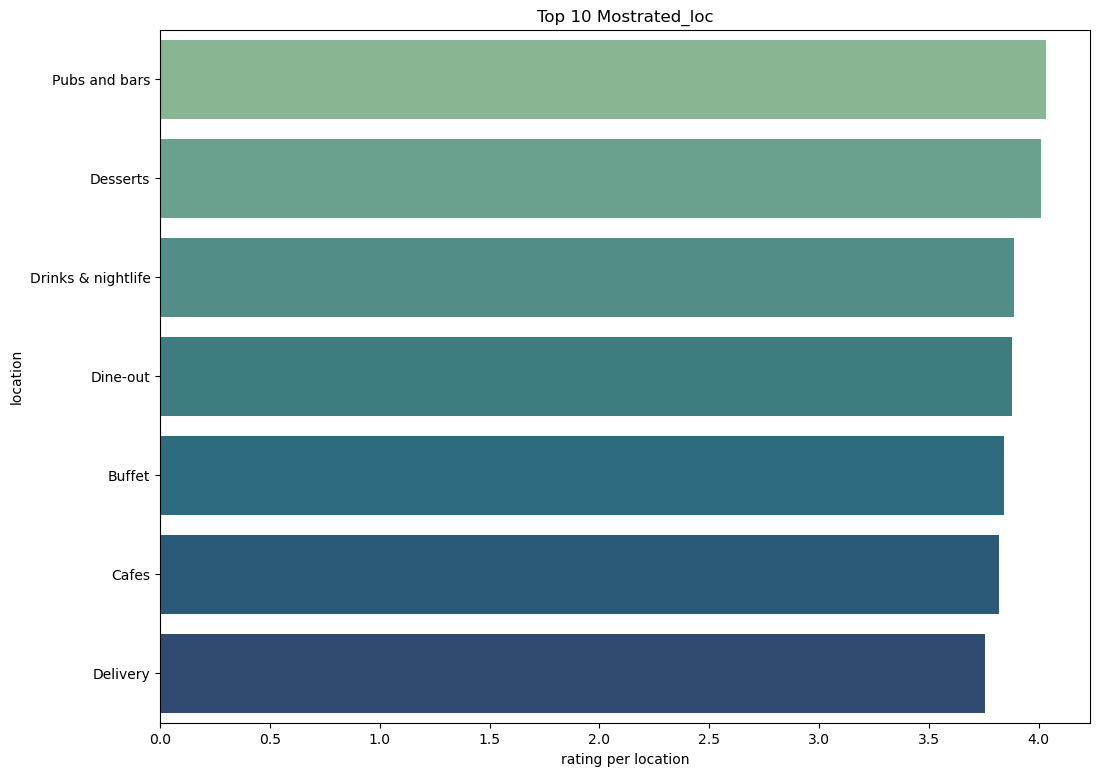

In [60]:
plt.figure(figsize=(12,9))
sns.barplot(y='type', x='rating', data= Mostrated_loc, palette= 'crest')
plt.xlabel('rating per location')
plt.ylabel('location')
plt.title('Top 10 Mostrated_loc')
plt.show()

In [61]:
cleaned_data.groupby('dish_liked')['rating'].max()[:10].sort_values(ascending=True).sort_values(ascending=False)

dish_liked
Aloo Gobhi, Mocktails, Veg Buffet, Dahi Vada, Salads, Chaat, Buttermilk                                4.3
Akki Rottis, Roti, Rava Idli, Filter Coffee, Pongal, Masala Dosa, Kokum Juice                          4.0
Akki Rottis, Rumali Roti, Masala Dosa, Vada, Raagi Roti, Rava Idli, Coffee                             4.0
Aloo Palya, Masala Poori, Panipuri, Rolls, Chaat, Benne Dosa, Dahipuri                                 4.0
Aloo Paratha, Burgers, Momos, Gulab Jamun, Mutton Roganjosh, Noodles, Butter Chicken                   3.9
Akki Rottis, Neer Dosa                                                                                 3.7
Aloo Paratha                                                                                           3.2
Afghan Chicken                                                                                         2.9
Al Faham Chicken, Kalmi Kebab, Bbq Chicken, Chicken Tikka, Shawarma, Malabari Biryani, Chicken Wrap    2.8
Aloo Paratha, Ande Ka Fund

In [62]:
Mostrated_dish_likes = cleaned_data.groupby('dish_liked')['rating'].max()[:10].sort_values(ascending=True).sort_values(ascending=False).reset_index()

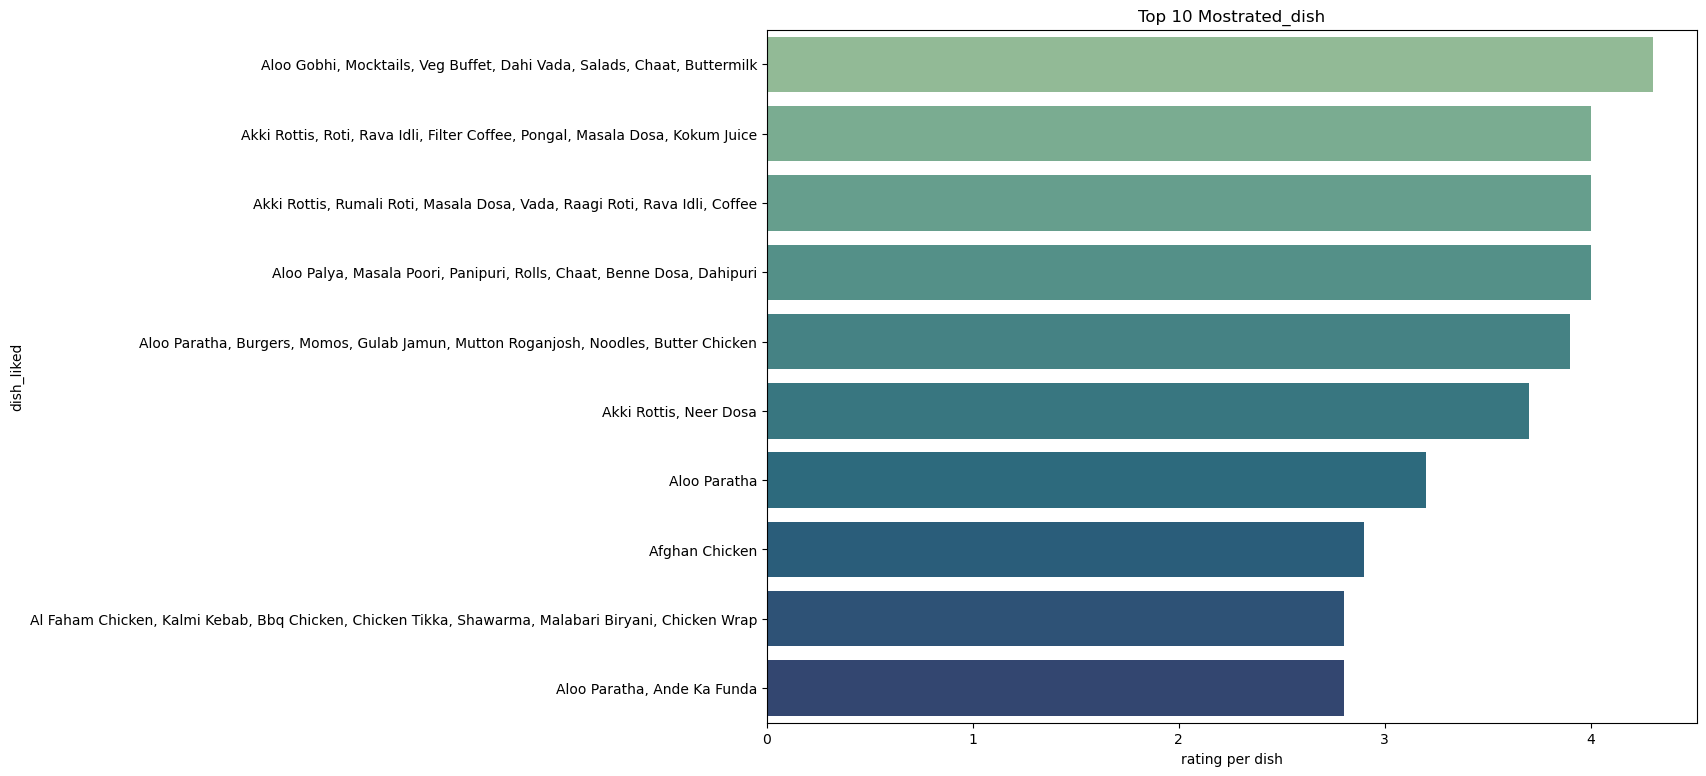

In [63]:
plt.figure(figsize=(12,9))
sns.barplot(y= 'dish_liked', x='rating', data= Mostrated_dish_likes, palette= 'crest')
plt.xlabel('rating per dish')
plt.ylabel('dish_liked')
plt.title('Top 10 Mostrated_dish')
plt.show()

In [64]:
## visualizing the top 10 rated cusines
cleaned_data.groupby(['cuisines'])['rating'].max()[:10].sort_values(ascending=True).sort_values(ascending=False)

cuisines
African, Burger, Desserts, Beverages, Fast Food                      4.6
American, Continental, Steak                                         4.4
American, Chinese, Continental, North Indian                         4.3
American, Continental, North Indian, South Indian                    4.3
American, Burger, Fast Food                                          4.2
American, Asian, Continental, North Indian, South Indian, Chinese    4.1
American, Continental, Chinese                                       4.1
American, Continental, Fast Food, Steak                              4.1
American, Burger, Italian, Steak                                     3.9
American, Continental, Finger Food                                   3.9
Name: rating, dtype: float64

In [65]:
## visualizing the top 10 rated cusines
Most_liked_cuisine = cleaned_data.groupby(['cuisines'])['rating'].max()[:10].sort_values(ascending=True).sort_values(ascending=False).reset_index()

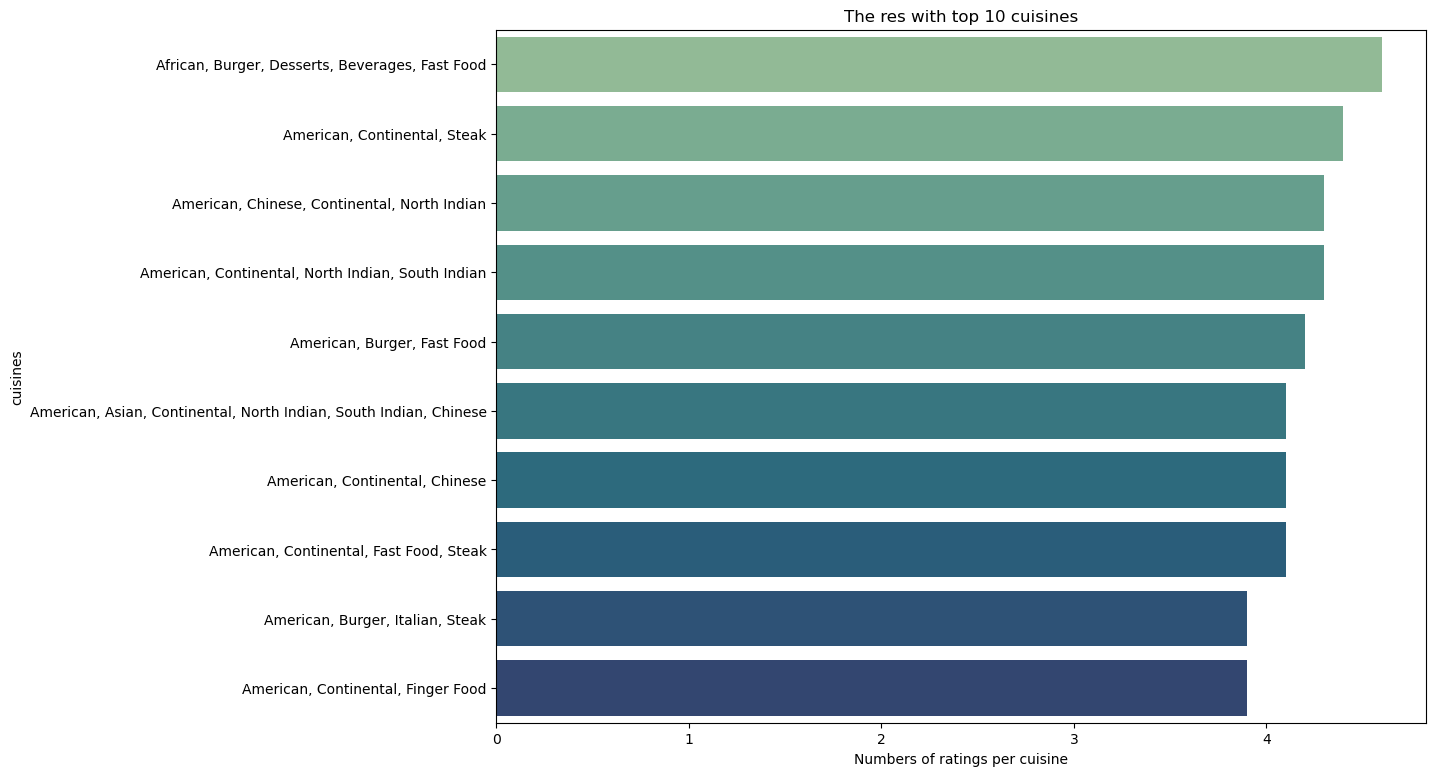

In [66]:
plt.figure(figsize=(12,9))
sns.barplot(y='cuisines', x='rating', data= Most_liked_cuisine, palette= 'crest')
plt.xlabel('Numbers of ratings per cuisine')
plt.ylabel('cuisines')
plt.title('The res with top 10 cuisines')
plt.show()

In [67]:
## visualizing the top 10 rated cusines
Top_cost = cleaned_data.groupby('cuisines')['approx_cost'].max()[:10].sort_values(ascending=True).sort_values(ascending=False).reset_index()

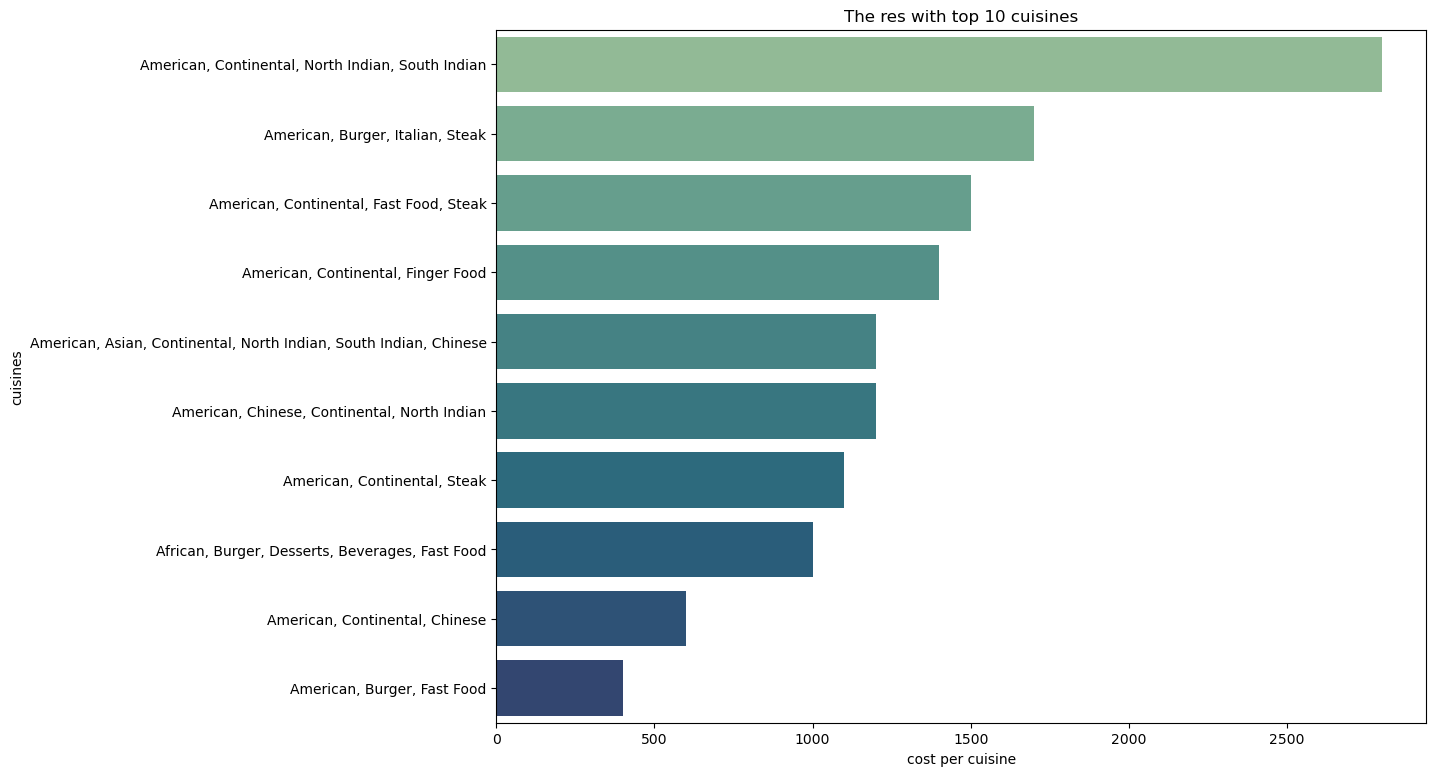

In [68]:
plt.figure(figsize=(12,9))
sns.barplot(y='cuisines', x='approx_cost', data= Top_cost, palette= 'crest')
plt.xlabel('cost per cuisine')
plt.ylabel('cuisines')
plt.title('The res with top 10 cuisines')
plt.show()

In [69]:
## visualizing the top 10 rated cusines
cleaned_data.groupby(['cuisines'])['approx_cost'].max()[:10].sort_values(ascending=True).sort_values(ascending=False)

cuisines
American, Continental, North Indian, South Indian                    2800.0
American, Burger, Italian, Steak                                     1700.0
American, Continental, Fast Food, Steak                              1500.0
American, Continental, Finger Food                                   1400.0
American, Asian, Continental, North Indian, South Indian, Chinese    1200.0
American, Chinese, Continental, North Indian                         1200.0
American, Continental, Steak                                         1100.0
African, Burger, Desserts, Beverages, Fast Food                      1000.0
American, Continental, Chinese                                        600.0
American, Burger, Fast Food                                           400.0
Name: approx_cost, dtype: float64

In [70]:
## geting the min() of online orders
Onlineorder_ratings = cleaned_data.groupby(['online_order'])['rating'].mean().reset_index()

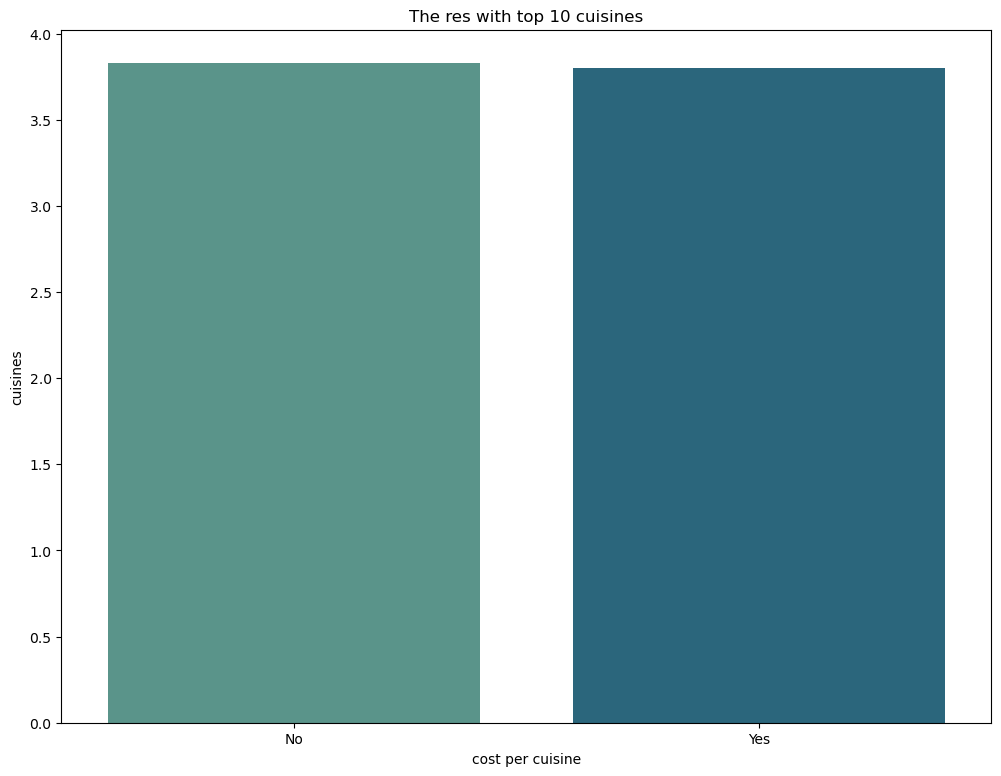

In [71]:
plt.figure(figsize=(12,9))
sns.barplot(x='online_order', y='rating', data = Onlineorder_ratings, palette= 'crest')
plt.xlabel('cost per cuisine')
plt.ylabel('cuisines')
plt.title('The res with top 10 cuisines')
plt.show()

In [72]:
cleaned_data.groupby(['online_order'])['rating'].mean()

online_order
No     3.830658
Yes    3.800933
Name: rating, dtype: float64

In [73]:
type_rating = cleaned_data.groupby('type')['rating'].max()[:10].sort_values(ascending=True).sort_values(ascending=False).reset_index()

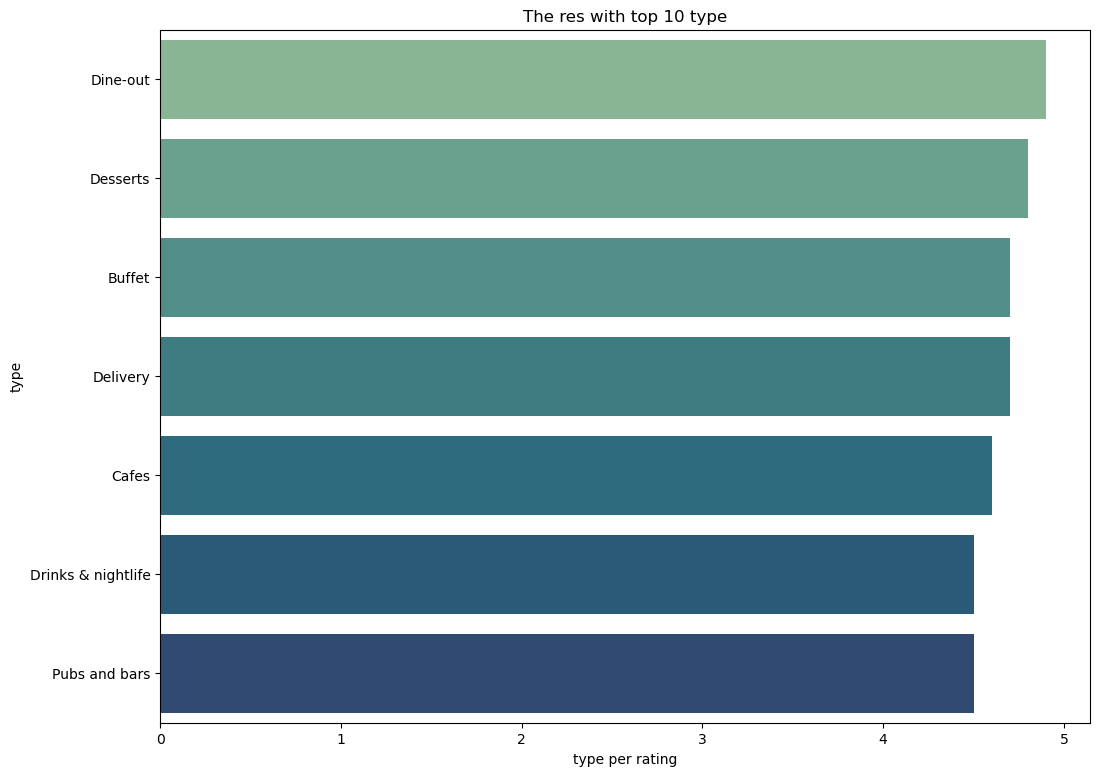

In [74]:
plt.figure(figsize=(12,9))
sns.barplot(y='type', x='rating', data = type_rating, palette= 'crest')
plt.xlabel('type per rating')
plt.ylabel('type')
plt.title('The res with top 10 type')
plt.show()

In [75]:
cleaned_data.groupby('type')['rating'].max()[:10].sort_values(ascending=True).sort_values(ascending=False)

type
Dine-out              4.9
Desserts              4.8
Buffet                4.7
Delivery              4.7
Cafes                 4.6
Drinks & nightlife    4.5
Pubs and bars         4.5
Name: rating, dtype: float64

In [76]:
booked_table = cleaned_data['book_table'].value_counts().reset_index()

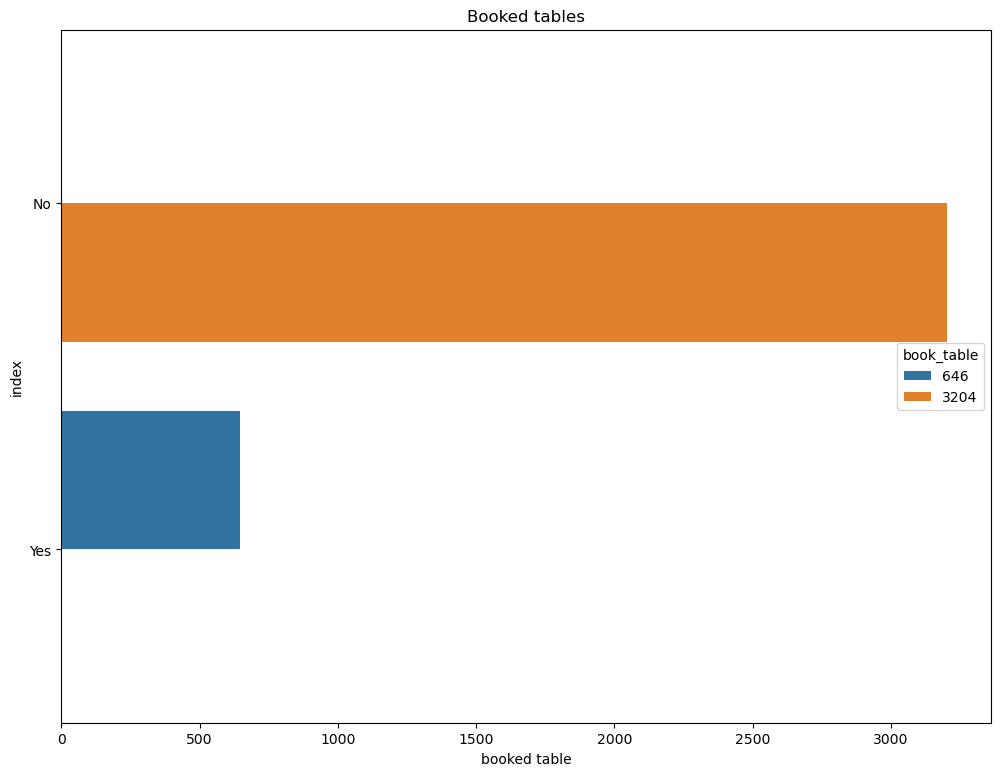

In [77]:
plt.figure(figsize=(12,9))
sns.barplot(x='book_table', y='index', hue='book_table', data= booked_table)
plt.xlabel('booked table')
plt.ylabel('index')
plt.title('Booked tables')
plt.show()

In [78]:
cleaned_data['book_table'].value_counts()

No     3204
Yes     646
Name: book_table, dtype: int64

In [79]:
online_orders = cleaned_data['online_order'].value_counts().reset_index()

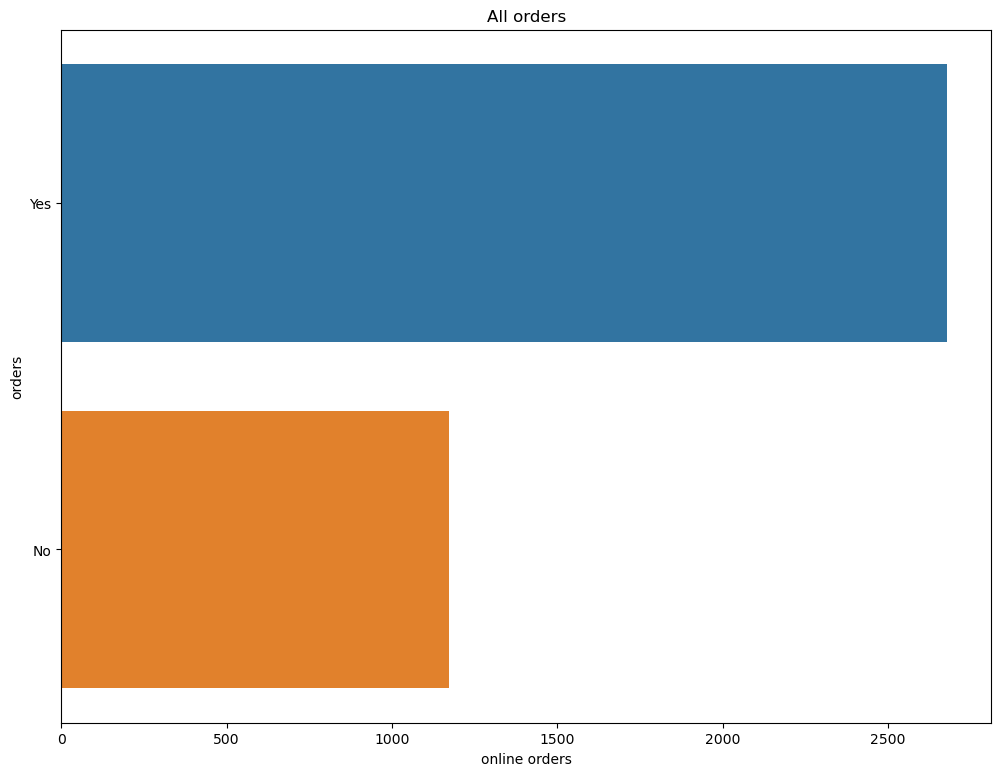

In [80]:
plt.figure(figsize=(12,9))
sns.barplot(x='online_order', y='index', data= online_orders)
plt.xlabel('online orders')
plt.ylabel('orders')
plt.title('All orders')
plt.show()

In [81]:
## using value count on the groupby() method
cleaned_data['online_order'].value_counts()

Yes    2679
No     1171
Name: online_order, dtype: int64

In [82]:
cleaned_data.groupby('rest_type')['approx_cost'].max()[:10].sort_values(ascending=True).sort_values(ascending=False)

rest_type
Bar, Lounge                      3000.0
Bar                              2500.0
Bar, Casual Dining               2000.0
Bakery, Cafe                     1400.0
Bakery                            750.0
Bakery, Quick Bites               600.0
Beverage Shop                     600.0
Bakery, Dessert Parlor            500.0
Beverage Shop, Cafe               500.0
Beverage Shop, Dessert Parlor     400.0
Name: approx_cost, dtype: float64

In [83]:
approx_Cost = cleaned_data.groupby('rest_type')['approx_cost'].max()[:10].sort_values(ascending=True).sort_values(ascending=False).reset_index()

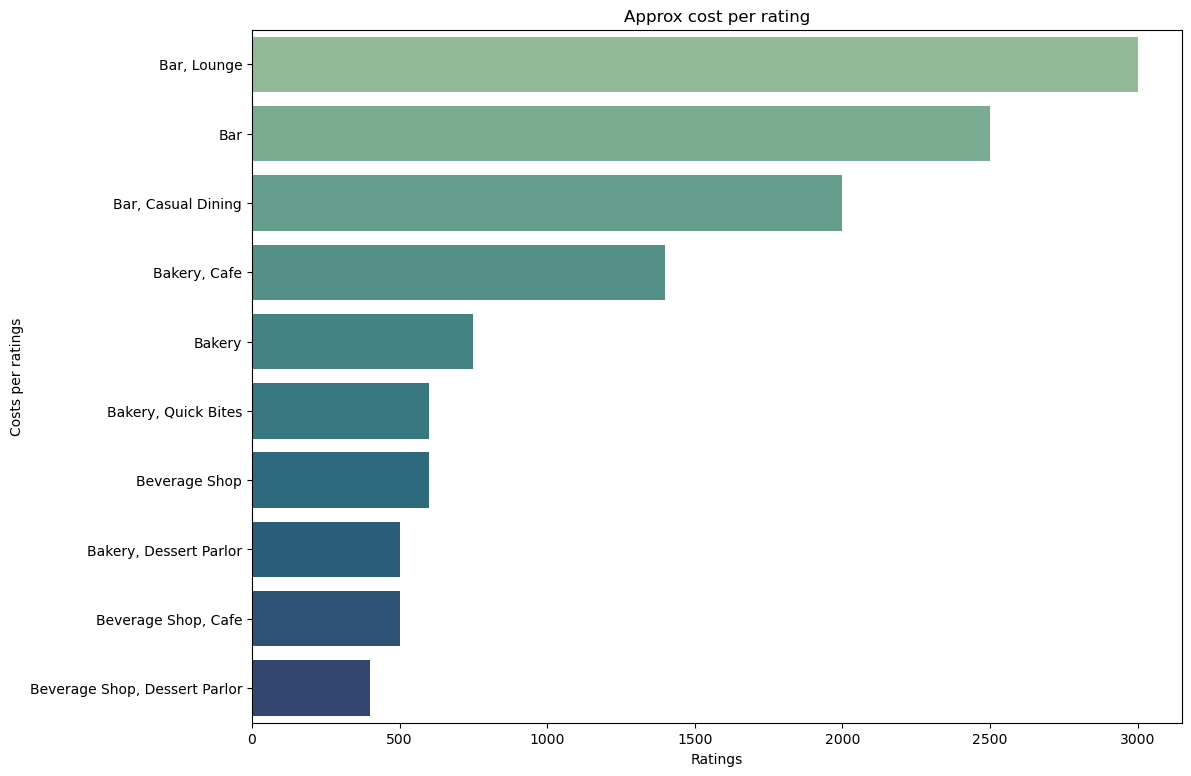

In [84]:
plt.figure(figsize=(12,9))
sns.barplot( y='rest_type', x='approx_cost', data= approx_Cost, palette='crest')
plt.xlabel('Ratings')
plt.ylabel('Costs per ratings')
plt.title('Approx cost per rating')
plt.show()

In [85]:
cleaned_data.groupby(['dish_liked'])['name'].max().value_counts()[:10]

KFC                          23
McDonald's                   22
Pizza Hut                    21
Faasos                       21
Domino's Pizza               19
Beijing Bites                17
Mojo Pizza - 2X Toppings     16
Corner House Ice Cream       16
BOX8- Desi Meals             16
A2B - Adyar Ananda Bhavan    16
Name: name, dtype: int64

In [86]:
## showing the most liked dish
mostliked_dish = cleaned_data.groupby(['dish_liked'])['name'].max().value_counts()[:10].reset_index()

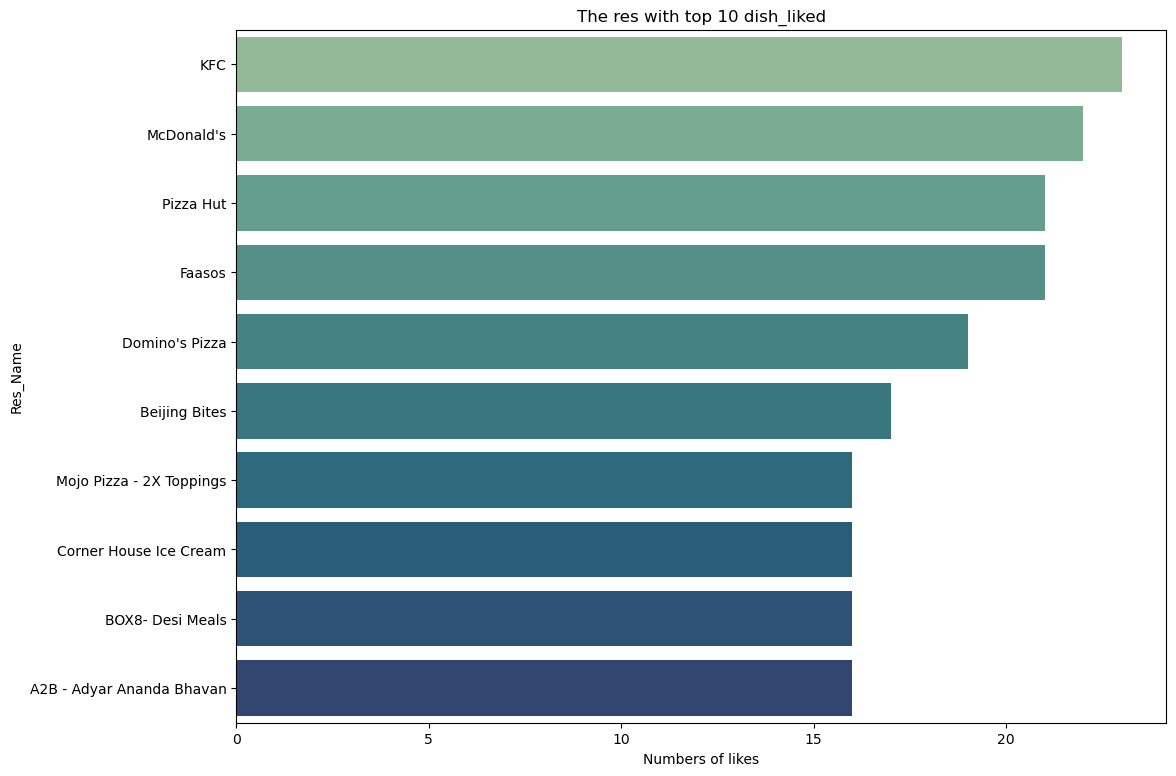

In [87]:
plt.figure(figsize=(12,9))
sns.barplot(y='index', x='name', data= mostliked_dish, palette= 'crest')
plt.xlabel('Numbers of likes')
plt.ylabel('Res_Name')
plt.title('The res with top 10 dish_liked')
plt.show()

In [88]:
## For the max
Max_cost = cleaned_data.groupby('dish_liked')['approx_cost'].max()[:10].sort_values(ascending=True).sort_values(ascending=False).reset_index()

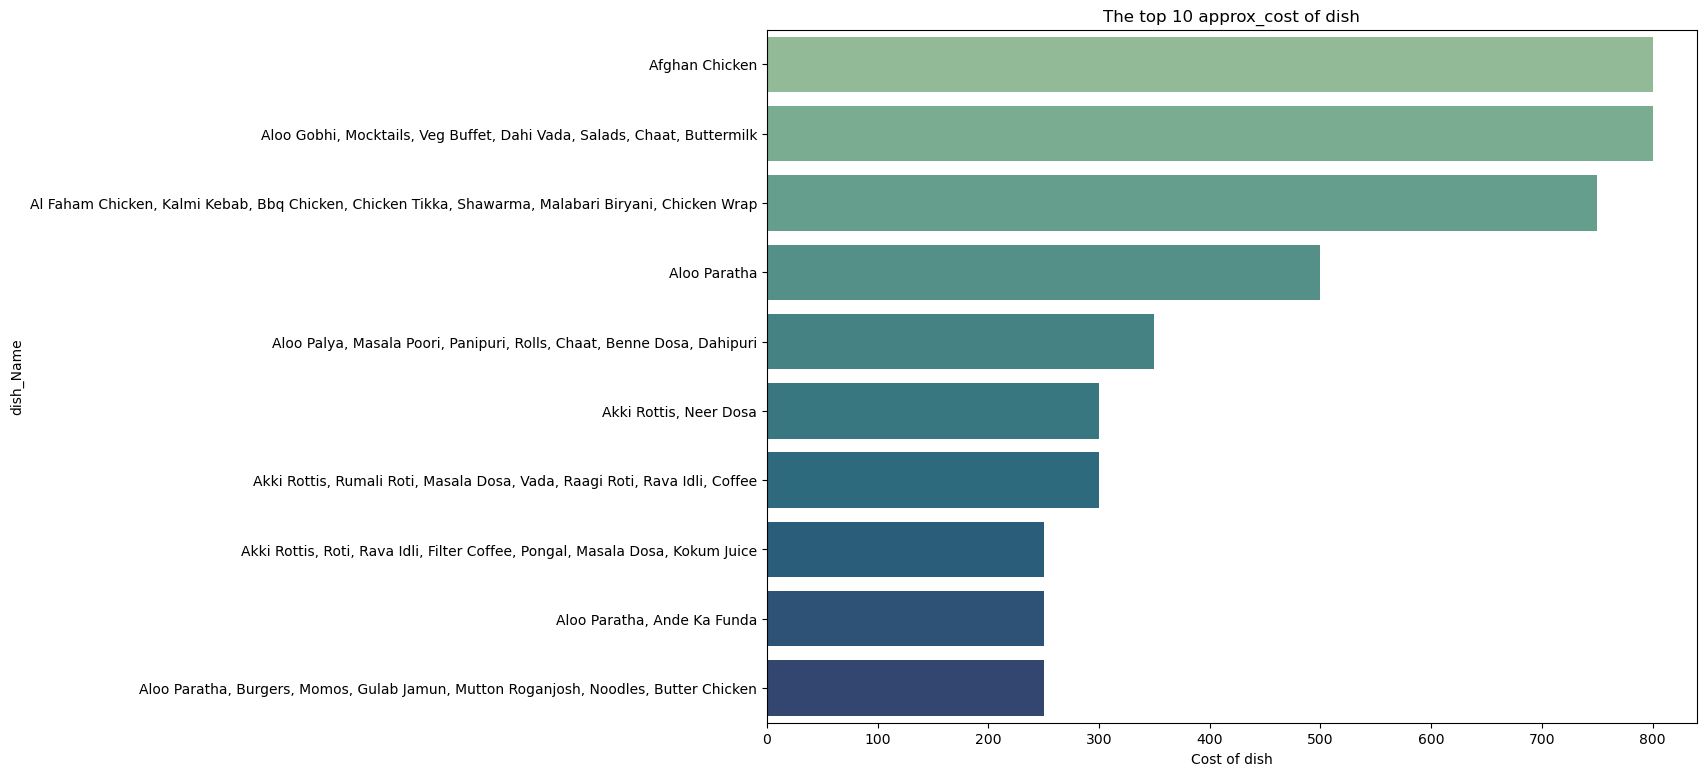

In [89]:
## For maximum
plt.figure(figsize=(12,9))
sns.barplot(y='dish_liked', x='approx_cost', data= Max_cost, palette= 'crest')
plt.xlabel('Cost of dish')
plt.ylabel('dish_Name')
plt.title('The top 10 approx_cost of dish')
plt.show()

In [90]:
cleaned_data.groupby('dish_liked')['approx_cost'].max()[:10].sort_values(ascending=True).sort_values(ascending=False)

dish_liked
Afghan Chicken                                                                                         800.0
Aloo Gobhi, Mocktails, Veg Buffet, Dahi Vada, Salads, Chaat, Buttermilk                                800.0
Al Faham Chicken, Kalmi Kebab, Bbq Chicken, Chicken Tikka, Shawarma, Malabari Biryani, Chicken Wrap    750.0
Aloo Paratha                                                                                           500.0
Aloo Palya, Masala Poori, Panipuri, Rolls, Chaat, Benne Dosa, Dahipuri                                 350.0
Akki Rottis, Neer Dosa                                                                                 300.0
Akki Rottis, Rumali Roti, Masala Dosa, Vada, Raagi Roti, Rava Idli, Coffee                             300.0
Akki Rottis, Roti, Rava Idli, Filter Coffee, Pongal, Masala Dosa, Kokum Juice                          250.0
Aloo Paratha, Ande Ka Funda                                                                            250.0
Aloo Par

In [91]:
## For location with the highest votes of recommendations
Max_votes = df.groupby('location')['votes'].max()[:10].sort_values(ascending=True).sort_values(ascending=False).reset_index()

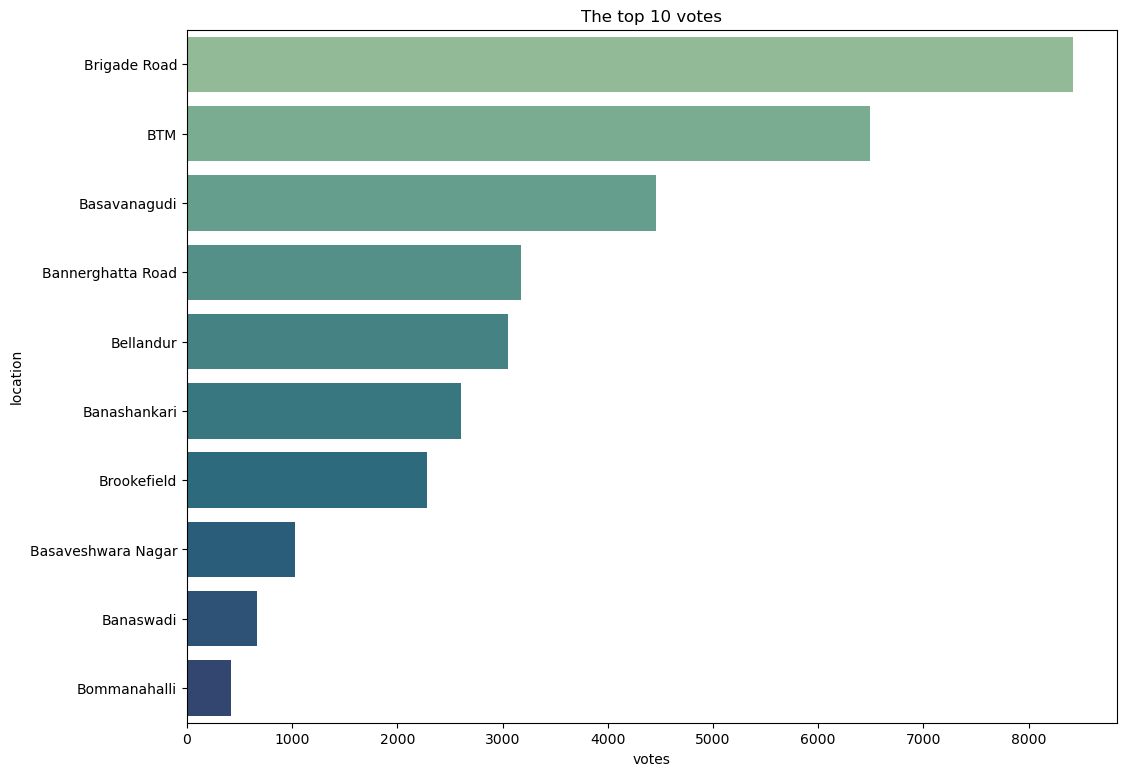

In [92]:
plt.figure(figsize=(12,9))
sns.barplot(y='location', x='votes', data= Max_votes, palette= 'crest')
plt.xlabel('votes')
plt.ylabel('location')
plt.title('The top 10 votes')
plt.show()